### WGU D212 Data Mining II
# Task 3 - Association Rules and List Analysis

#### Ednalyn C. De Dios
#### August 27, 2023


# Environment

- Python: 3.9.9
- Jupyter: 7.0.2

# Part I - Research Question

## A1.  Propose one question relevant to a real-world organizational situation that you will answer by using principal component analysis (PCA).

> ### _Can the principal components of the customer base be identified using Principal Component Analysis?_

## A2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The ultimate goal of this data analysis is to reduce operating costs by increasing the efficiency of the organization's marketing efforts. We will use Principal Component Analysis (PCA) as a dimensionality reduction technique to identify the principal components of the data set. This will inform the decisions of stakeholders in matters where customer retention is involved, for example. Knowing which principal components accounts for the variance  will provide the organization with advanced insight towards that customer's characteristics or behavior. Thereby increasing the effectiveness of marketing campaigns.

# Part II - Method Justification

## B1.  Explain how PCA analyzes the selected data set. Include expected outcomes.

PCA analyzes the selected by first stardardizing the data set and fitting it. Then, the variances of each component were plotted to discern the optimal number of k clusters using the elbow method. After choosing the number of k clusters, we then fit and transform the data set again with designated k number of clusters. The variances for each of the principal components were noted and then added to calculate the total variance captured by the principal components.

## B2. Summarize one assumption of PCA.

PCA or Principal Component Analysis makes multiple assumptions about the data set but the biggest in my opinion is that variable should have correlation (Sharma, 2021). Data sets with high correlation between variables works best for PCA so that it can reduce the number of dimensions in the data set. Otherwise, there will be no reduction in dimensionality that can take place.

# Part III - Data Preparation

## C1.  Identify the continuous dataset variables that you will need in order to answer the PCA question proposed in part A1.

In [1]:
columns = ['Population',
           'Children',
           'Age',
           'Income',
           'Outage_sec_perweek',
           'Email',
           'Contacts',
           'Yearly_equip_failure',
           'Tenure',
           'MonthlyCharge',
           'Bandwidth_GB_Year',
          ]

In [2]:
# setting the random seed for reproducibility
import random
random.seed(493)

# for manipulating dataframes
import pandas as pd
import numpy as np

# for visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
from IPython.display import Image

# for modeling
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# to print out all the outputs of the cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# set display options
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [3]:
# read the csv file
df = pd.read_csv('churn_clean.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


{'whiskers': [<matplotlib.lines.Line2D at 0x1a546f77760>,
 'caps': [<matplotlib.lines.Line2D at 0x1a546f77cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a546f774c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a546f97250>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a546f974f0>],
 'means': []}

Text(0.5, 1.0, 'Population')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a546fe43a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a546fe48e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a546fe4100>],
 'medians': [<matplotlib.lines.Line2D at 0x1a546fe4e20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a546ff4100>],
 'means': []}

Text(0.5, 1.0, 'Children')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a547038100>,
 'caps': [<matplotlib.lines.Line2D at 0x1a546fd3040>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a547027e20>],
 'medians': [<matplotlib.lines.Line2D at 0x1a547038700>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5470389a0>],
 'means': []}

Text(0.5, 1.0, 'Age')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a547080910>,
 'caps': [<matplotlib.lines.Line2D at 0x1a547080d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a547080670>],
 'medians': [<matplotlib.lines.Line2D at 0x1a54708d2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a54708d550>],
 'means': []}

Text(0.5, 1.0, 'Income')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5470d53d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5470d57f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5470d5130>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5470d5d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5470d5fd0>],
 'means': []}

Text(0.5, 1.0, 'Outage_sec_perweek')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5470f5be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a54712d130>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a547119c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1a54712d670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a54712d910>],
 'means': []}

Text(0.5, 1.0, 'Email')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a547170730>,
 'caps': [<matplotlib.lines.Line2D at 0x1a547170c70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5471705b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a54717f1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a54717f490>],
 'means': []}

Text(0.5, 1.0, 'Contacts')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5471c71c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5471c7700>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5471b8ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5471c7c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5471c7ee0>],
 'means': []}

Text(0.5, 1.0, 'Yearly_equip_failure')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a54720cb20>,
 'caps': [<matplotlib.lines.Line2D at 0x1a54721e0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a54720c880>],
 'medians': [<matplotlib.lines.Line2D at 0x1a54721e5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a54721e880>],
 'means': []}

Text(0.5, 1.0, 'Tenure')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5472636d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1a547263c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a547263430>],
 'medians': [<matplotlib.lines.Line2D at 0x1a547273190>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a547273430>],
 'means': []}

Text(0.5, 1.0, 'MonthlyCharge')

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5475c9160>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5475c96a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5472a8e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5475c9be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5475c9e80>],
 'means': []}

Text(0.5, 1.0, 'Bandwidth_GB_Year')

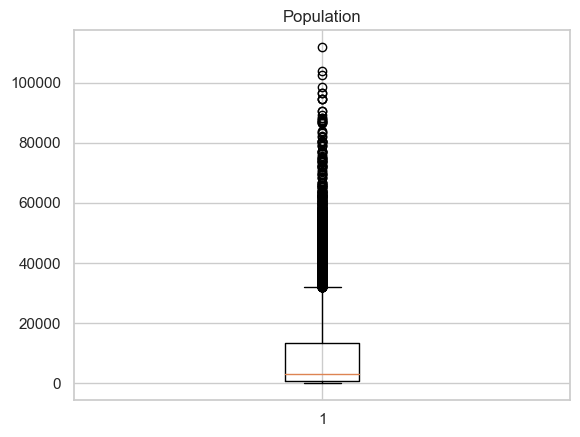

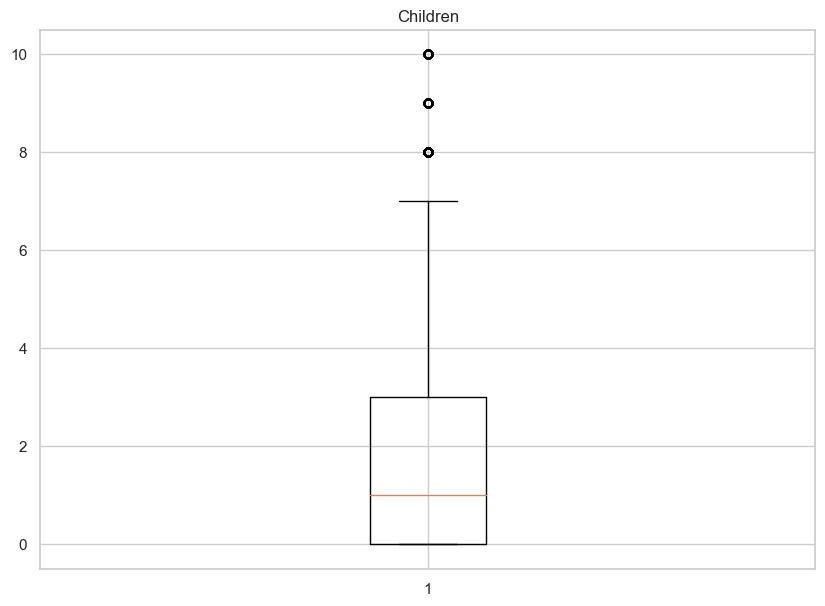

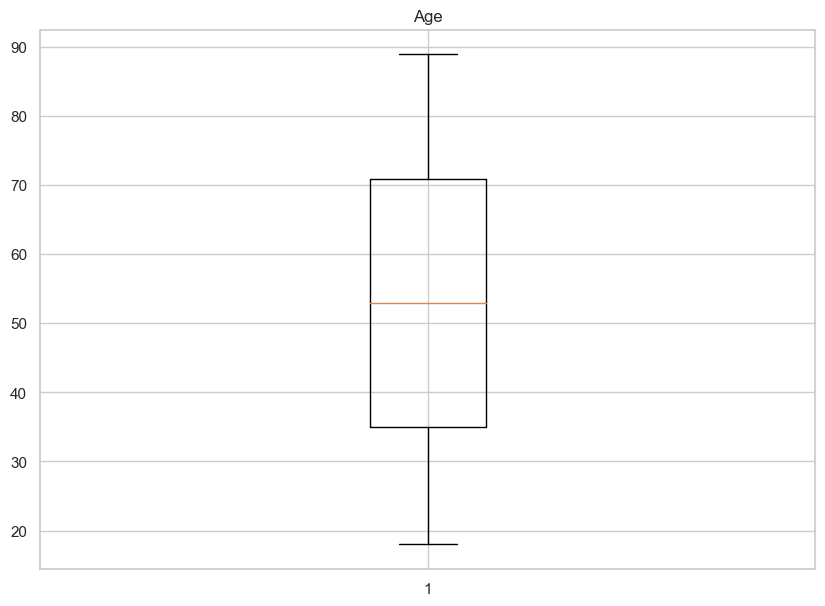

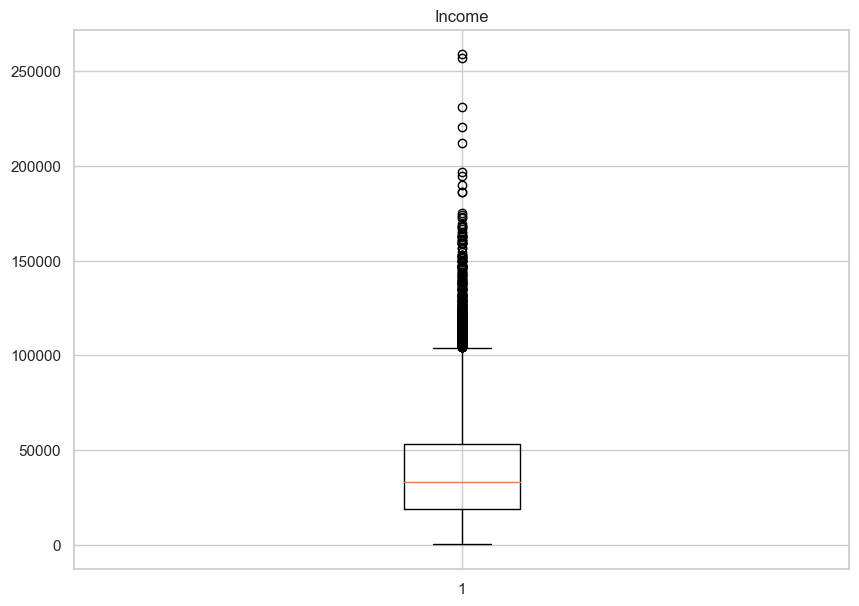

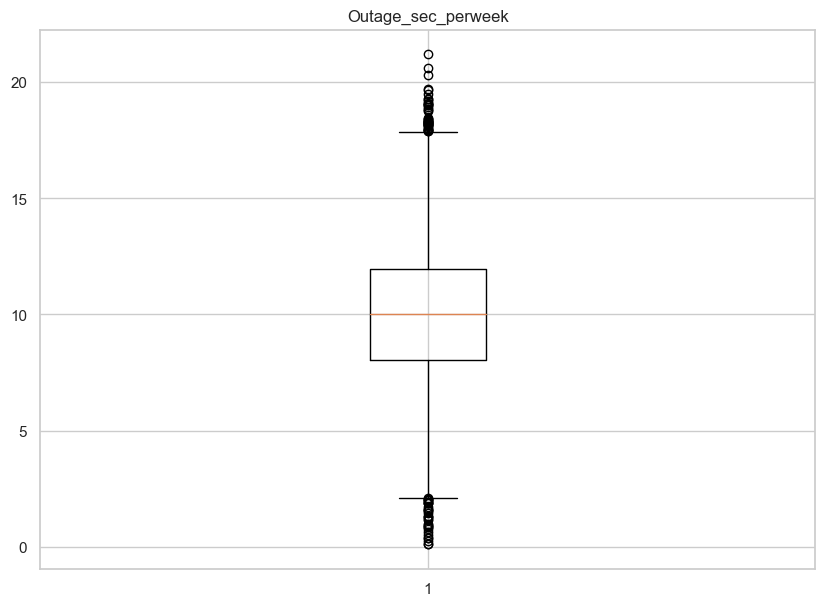

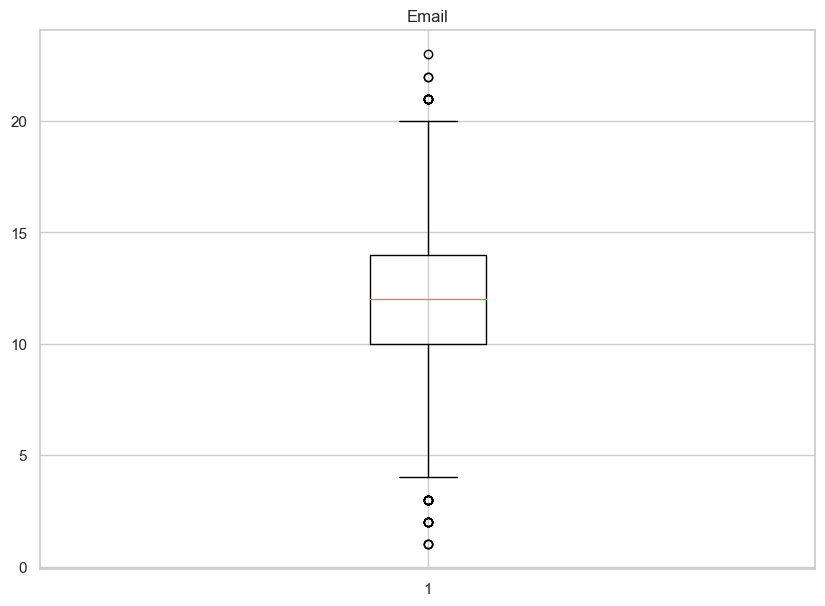

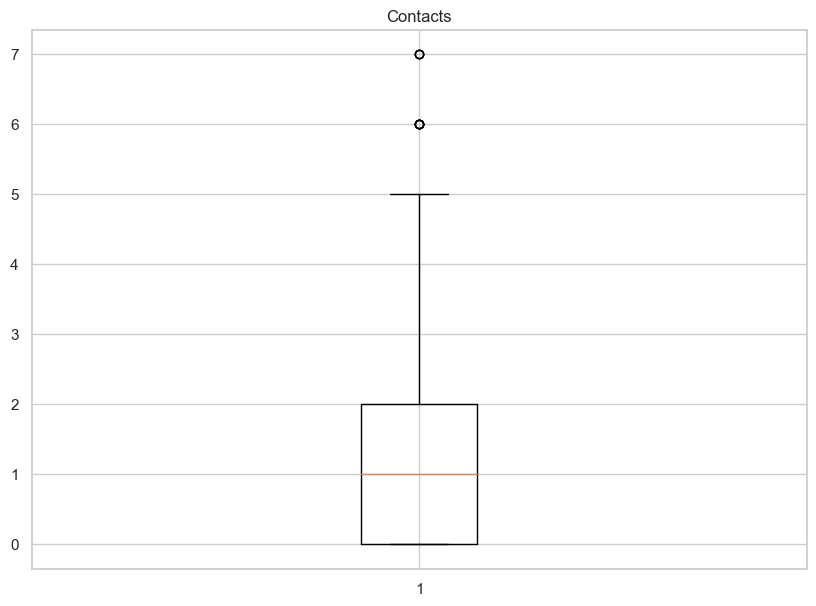

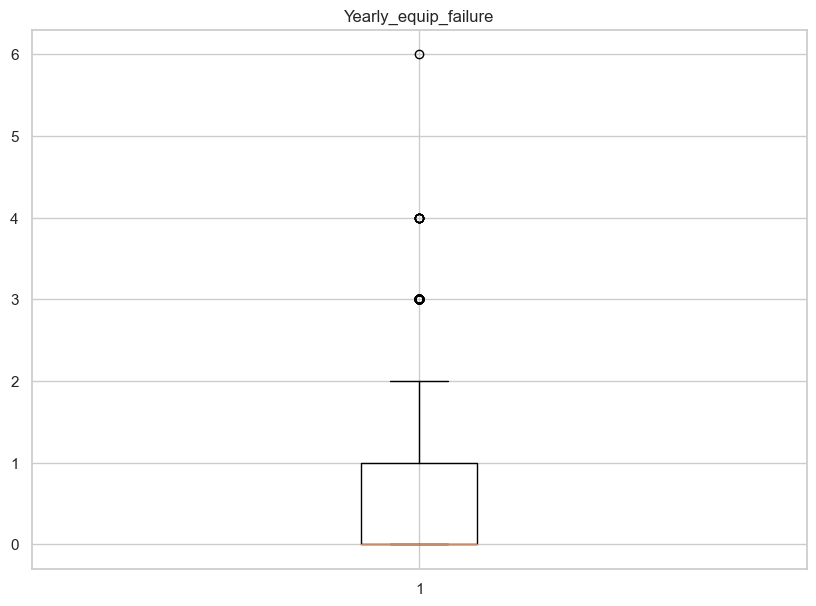

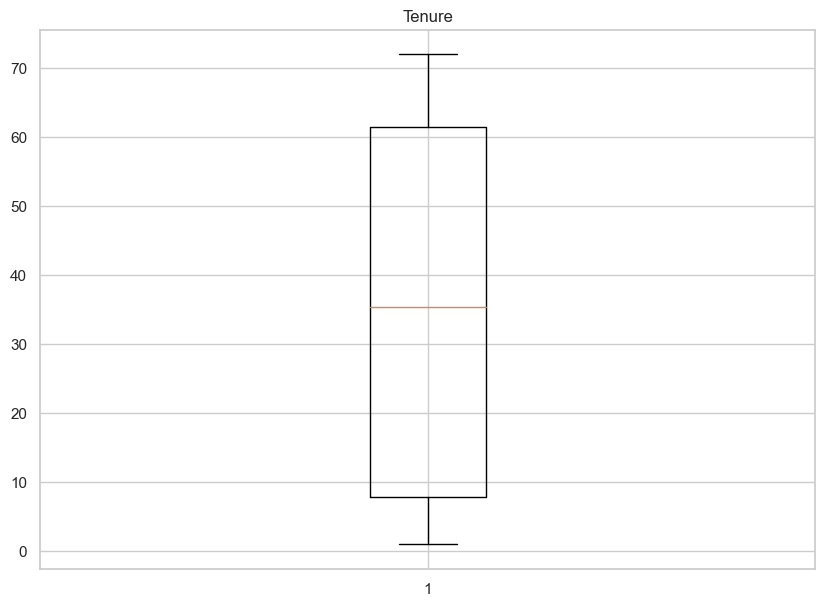

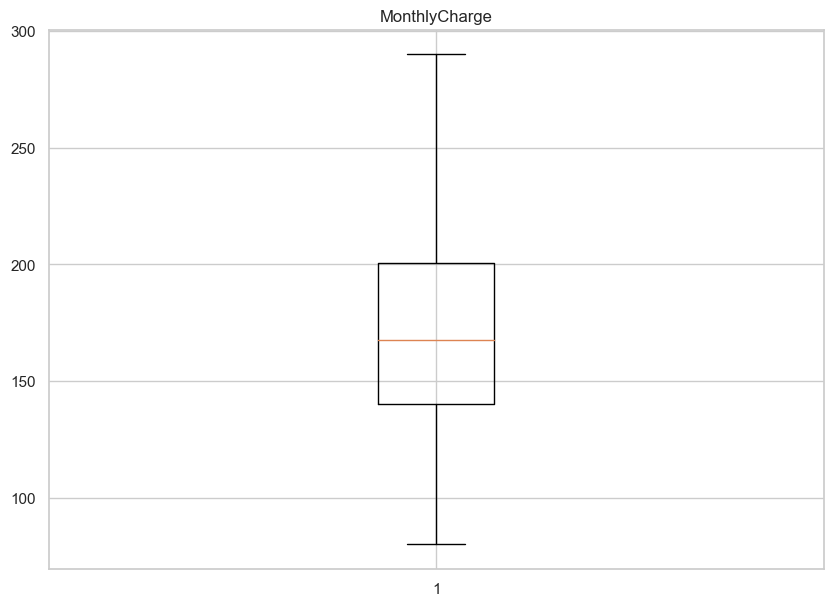

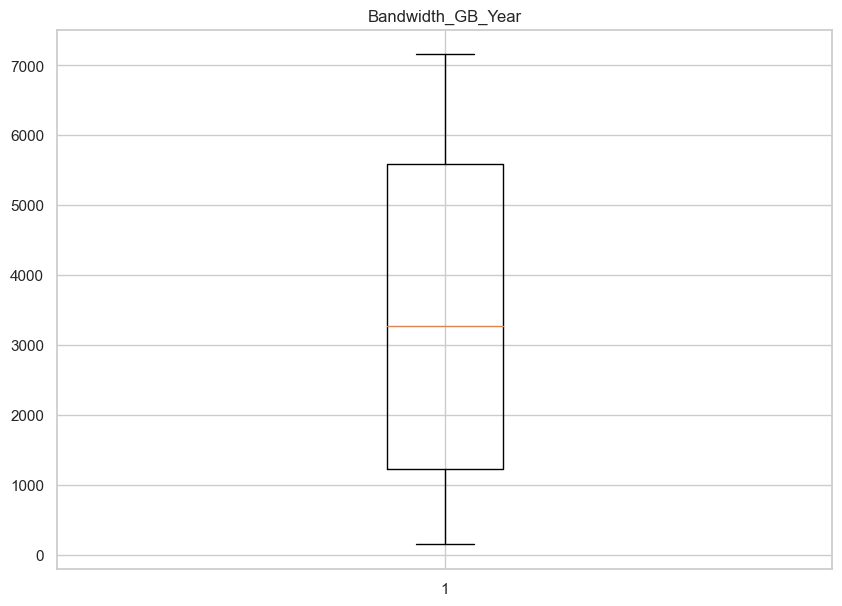

<Figure size 1000x700 with 0 Axes>

In [4]:
for col in columns:
    # show outliers
    plt.boxplot(df[col])
    plt.title(col)
    fig = plt.figure(figsize =(10, 7))

In [5]:
# remove outliers in "Population"
df = df[df['Population'] <= 30000]
df.shape

(8957, 50)

In [6]:
# remove outliers in "Children"
df = df[df['Children'] < 8]
df.shape

(8600, 50)

In [7]:
# remove outliers in "Income"
df = df[df['Income'] <= 100000]
df.shape

(8255, 50)

In [8]:
# remove outliers in "Outage_sec_perweek"
df = df[df['Outage_sec_perweek'] <= 17.5]
df.shape

(8198, 50)

In [9]:
# remove outliers in "Email"
df = df[df['Email'] <= 20]
df.shape

(8187, 50)

In [10]:
# remove outliers in "Contacts"
df = df[df['Contacts'] <= 5]
df.shape

(8181, 50)

In [11]:
# remove outliers in "Yearly_equip_failure"
df = df[df['Yearly_equip_failure'] <= 2]
df.shape

(8105, 50)

## C2.  Standardize the continuous dataset variables identified in part C1. Include a copy of the cleaned dataset.

In [12]:
df = df[columns]

array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>,
        <Axes: title={'center': 'Email'}>],
       [<Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>, <Axes: >]],
      dtype=object)

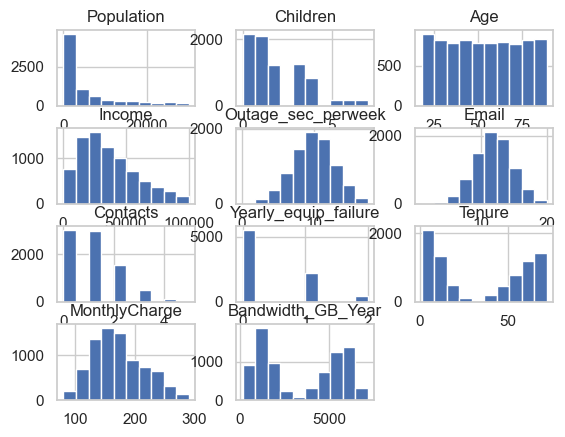

In [13]:
# make historgrams and save the plot
df[df.columns].hist()

In [14]:
# scale the data
scaler = StandardScaler()

# apply scaler() to all the continuous column
scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

scaled.head()

,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.763524,-1.069540,0.718481,-0.350998,-0.677041,-0.656913,-1.009708,1.079691,-1.048593,-0.008731,-1.135704
1,0.640643,-0.478753,-1.266577,-0.657046,0.606316,0.007418,-1.009708,1.079691,-1.261403,1.620472,-1.183055
2,-0.264753,1.293609,-0.153008,-1.196872,0.279927,-0.989078,-1.009708,1.079691,-0.710492,-0.299110,-0.609769
3,1.101638,-0.478753,-0.249840,-0.781101,1.715042,1.003913,1.024516,-0.641232,-0.660181,-1.227520,-0.559528
4,0.762874,-1.069540,1.444722,0.162809,-0.618718,1.336079,1.024516,1.079691,-1.241994,-0.531249,-1.425173


array([[<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Outage_sec_perweek'}>,
        <Axes: title={'center': 'Email'}>],
       [<Axes: title={'center': 'Contacts'}>,
        <Axes: title={'center': 'Yearly_equip_failure'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'MonthlyCharge'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>, <Axes: >]],
      dtype=object)

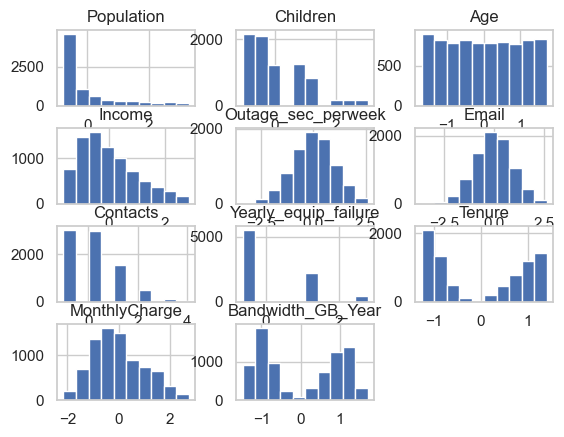

In [15]:
# make historgrams and save the plot
scaled[scaled.columns].hist()

In [16]:
# save the prepared data set
scaled.to_csv('churn_prepared2.csv', index=False)

# Part IV. Analysis

## D1.  Determine the matrix of all the principal components.

In [17]:
pca = PCA(n_components=6, random_state=493)
model = pca.fit_transform(scaled)
explained_ratio = pca.explained_variance_ratio_
explained_ratio

array([0.1813204 , 0.09673   , 0.09385725, 0.0920565 , 0.09105452,
       0.09085826])

In [18]:
print(pca.explained_variance_ratio_.cumsum())

[0.1813204  0.2780504  0.37190765 0.46396415 0.55501867 0.64587693]


In [19]:
matrix = pd.DataFrame(model, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [20]:
matrix.head()
matrix.tail()

,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.519209,-0.540523,-0.473303,0.861094,-0.652050,-1.097087
1,-1.653816,0.260500,1.735917,-0.171267,1.103416,-1.350004
2,-0.877558,-1.236562,0.909397,0.782003,-0.135945,-1.523216
3,-0.926511,1.736037,0.776245,-1.107354,-1.012047,0.374659
4,-1.930431,1.365848,-0.985916,0.598114,-0.916003,-0.457744


,PC1,PC2,PC3,PC4,PC5,PC6
8100,1.217256,1.689024,-0.249704,-1.031767,-1.481937,0.314613
8101,0.825883,-0.672417,-1.407049,-1.078539,-0.437635,0.631326
8102,1.866298,-0.797156,0.315489,-0.836525,-0.198837,1.478551
8103,0.569396,-0.993756,-1.129926,-0.385718,0.151184,0.082555
8104,1.554721,1.639923,1.075307,-1.916243,0.736876,-0.692976


## D2.  Identify the total number of principal components using the elbow rule or the Kaiser criterion. Include a screenshot of the scree plot.

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Scree Plot with Elbow')

Text(0.5, 0, 'Principal Components')

Text(0, 0.5, 'Explained Variance')

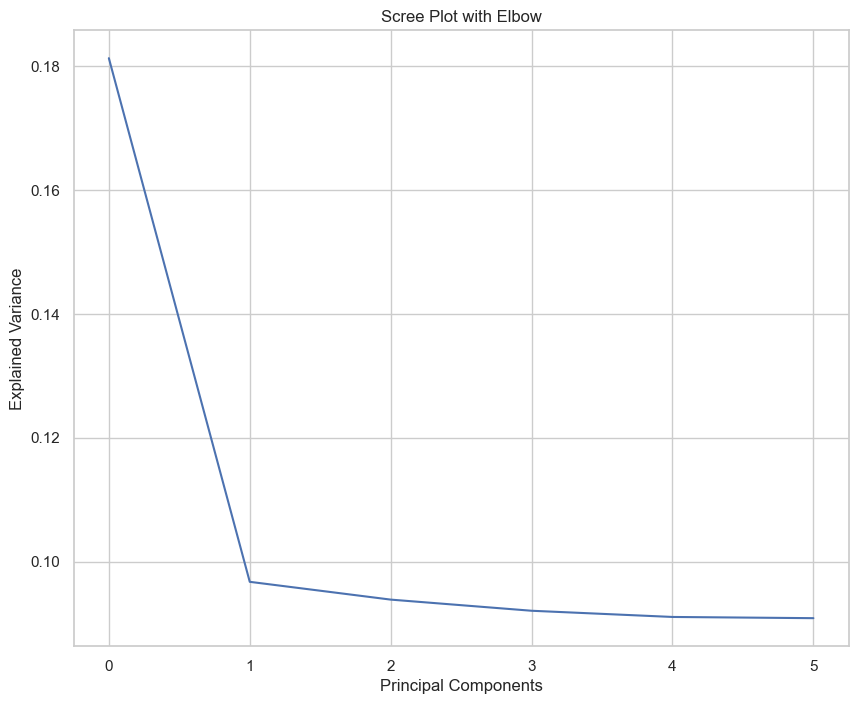

In [21]:
plt.figure(figsize=(10, 8))
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot with Elbow')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

Based on the scree plot above, two principal components are significant.

## D3.  Identify the variance of each of the principal components identified in part D2.

In [22]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
      if(i%10==0):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

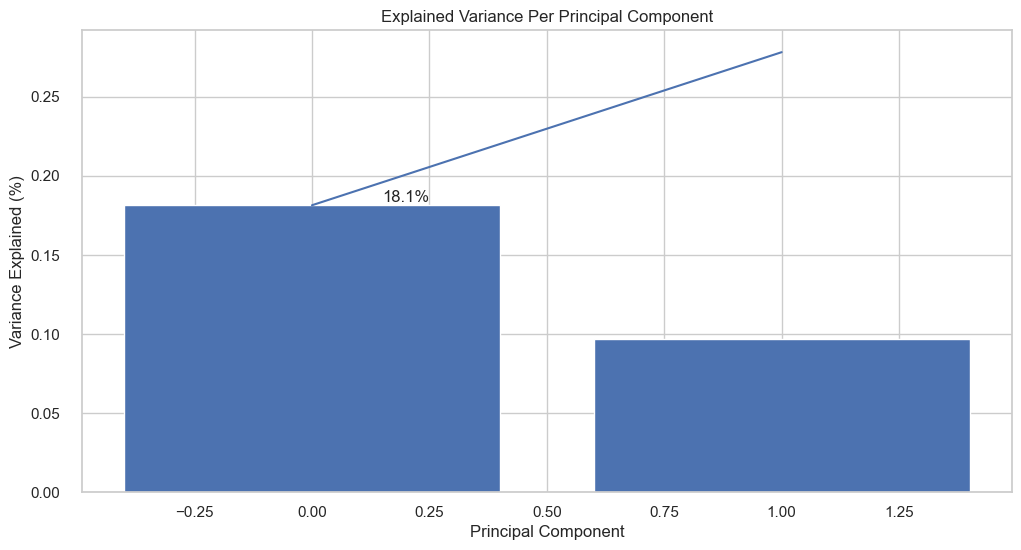

In [23]:
# Re-apply PCA to the data while selecting for number of components to retain.
pca = PCA(n_components=2)
model = pca.fit_transform(scaled)
scree_plot(pca)

In [24]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.1813204 0.09673  ]


## D4.  Identify the total variance captured by the principal components identified in part D2.

In [25]:
print(str(round(sum(pca.explained_variance_ratio_)*100, 2)) + "%")

27.81%


## D5.  Summarize the results of your data analysis.

While we were able to identify the principal components of the data set, I believe that the result of the analysis is inconclusive. The total variance captured by the principal components identified in part D2 is only 27.81%. This is simply not enough for any actionable insight to base on.

# Part V. Attachments

## E. Record the web sources used to acquire data or segments of third-party code to support the analysis. Ensure the web sources are reliable.

- https://github.com/ecdedios/code-snippets/blob/main/notebooks/master.ipynb
- https://github.com/ecdedios/d212-data-mining-ii/blob/main/D212%20Performance%20Assessment%20Task%201%20(Rev.%200).ipynb
- https://github.com/microbhai/CustomerChurnAnalysis/blob/master/PrincipalComponentAnalysis/PCAAnalysis.ipynb
- https://www.datacamp.com/tutorial/principal-component-analysis-in-python 

## F. Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

- https://medium.com/data-science-on-customer-churn-data/pca-or-principal-component-analysis-on-customer-churn-data-d18ca60397ed